In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import plot_is

In [3]:
cd /project/projectdirs/astro250/doris/ramses2/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses2/trunk/ramses/bin


In [7]:
import yt

In [10]:
def plot_time_slice(physical_quantity,timestep,text="",title="",zoom_factor="",grid=False,save=False):
    ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    slc = yt.SlicePlot(ds, "z",physical_quantity)
    slc.set_axes_unit('pc')
    if zoom_factor!="":
        slc.zoom(zoom_factor)
    slc.set_cmap(physical_quantity,"rainbow")
    slc.set_log(physical_quantity, False)
    slc.set_font_size(20)
    if title!="":
    	slc.annotate_title(title)
    if text!="":
	slc.annotate_text((0.1, 0.1),text, coord_system='axis')	
    slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
    slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
    slc.annotate_velocity()
    if(grid): 
	slc.annotate_grids()
    if (save):
       name  =str(timestep)#physical_quantity[:3]+str(timestep)
       slc.save(name)
    else:
       slc.show()


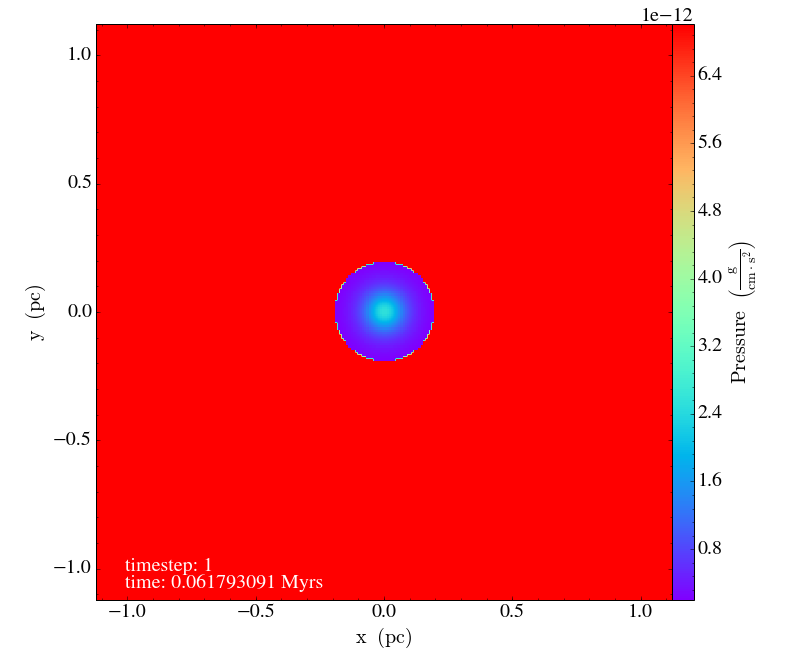

In [11]:
plot_time_slice("pressure",1)

# $\rho_c/\rho_0$ = 13

In [29]:
xi_max=7
rho_rat  = 13
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
idx = np.where(rho_c/rho>rho_rat)[0][0]
print "density contrast of ",rho_rat ,"happens at xi = ",xi[idx]

density contrast of  13 happens at xi =  6.250001


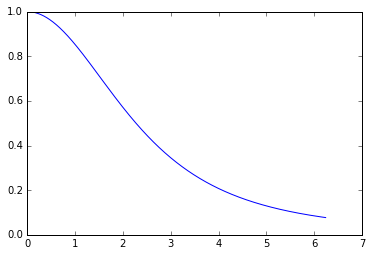

In [30]:
from scipy import integrate
rho_c = 0.02806
scale_d = 3.92e-18
xi_max = xi[idx]
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(xi,rho/rho_c)

In [31]:
print "Actual Density contrast of ", (rho_c/rho)[-1]

Actual Density contrast of  12.9551435553


In [47]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho/rho_c)

# Pressure setup 

In [48]:
dens_arr = np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")
rho_c = 0.02806
scale_d = 3.92e-18
rho_min = min(dens_arr)*rho_c*scale_d
print rho_min

8.49046554603e-21


In [49]:
T_in = 10#K
k = 1.38e-16 #cgs
mp = 1.6726219e-24 #grams
scale_p =  2.51e-9 
P_out = (rho_min*k*T_in/mp)/scale_p 
print "Pressure at edge of cloud : ",P_out*scale_p , "cgs"
print "Pressure at edge of cloud: ", P_out , "code units"

Pressure at edge of cloud :  7.00507535715e-12 cgs
Pressure at edge of cloud:  0.00279086667616 code units


In [50]:
T_out = 1e7#K
rho_out = ((P_out*scale_p)*mp/k/T_out)/scale_d
print "Denisty outside the cloud: " , rho_out*scale_d,"cgs"
print "Denisty outside the cloud: ", rho_out , "code units"

Denisty outside the cloud:  8.49046554603e-27 cgs
Denisty outside the cloud:  2.16593508827e-09 code units


In [52]:
print "Change the dens_arr length in condinit.f90 to: ",len(dens_arr)
print "Change the xi_max in condinit.f90 to : ",xi_max

Change the dens_arr length in condinit.f90 to:  625
Change the xi_max in condinit.f90 to :  6.250001


# Checking Pressure profile in cgs 

/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:645: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:701: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/global/homes/d/dorislee/anaconda/lib/python2.7/site-packages/matplotlib/quiver.py:711: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength



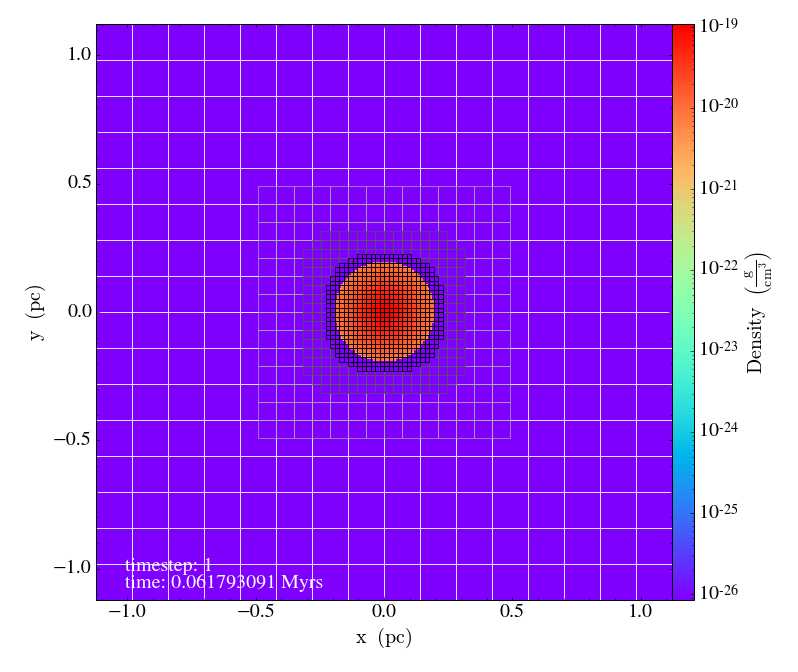


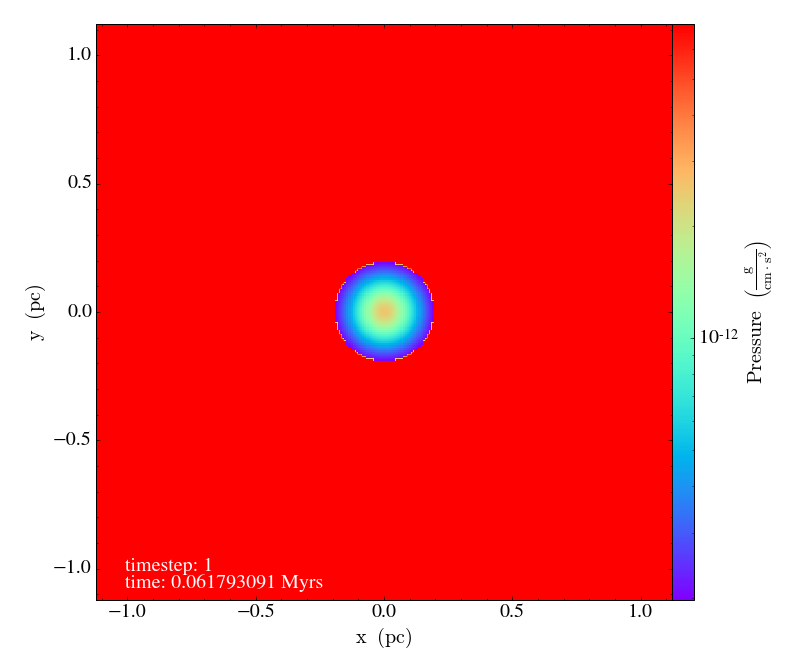


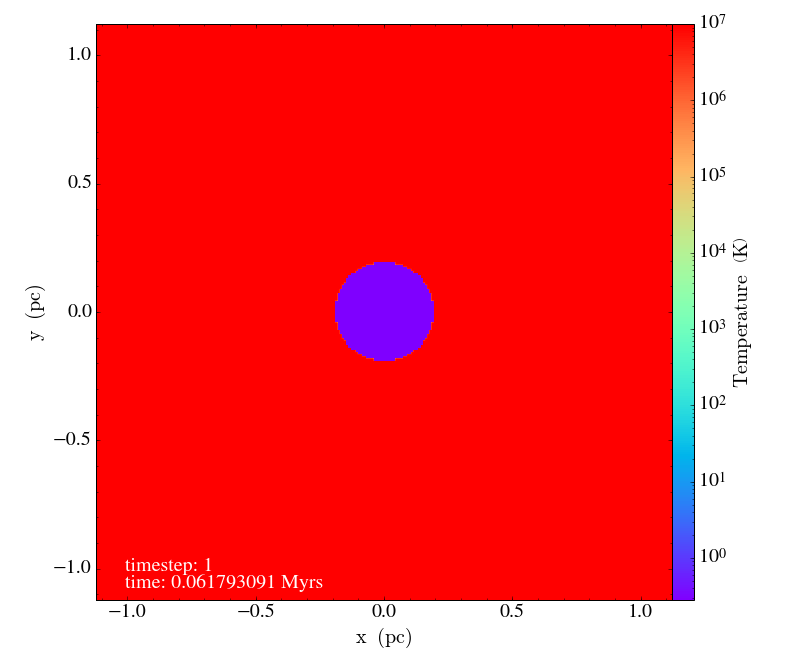

In [53]:
plot_is.plot_time_slice("density",1,grid=True)#,1,zmin=1e-26,zmax=1e-19)
plot_is.plot_time_slice("pressure",1)
plot_is.plot_time_slice("temperature",1)


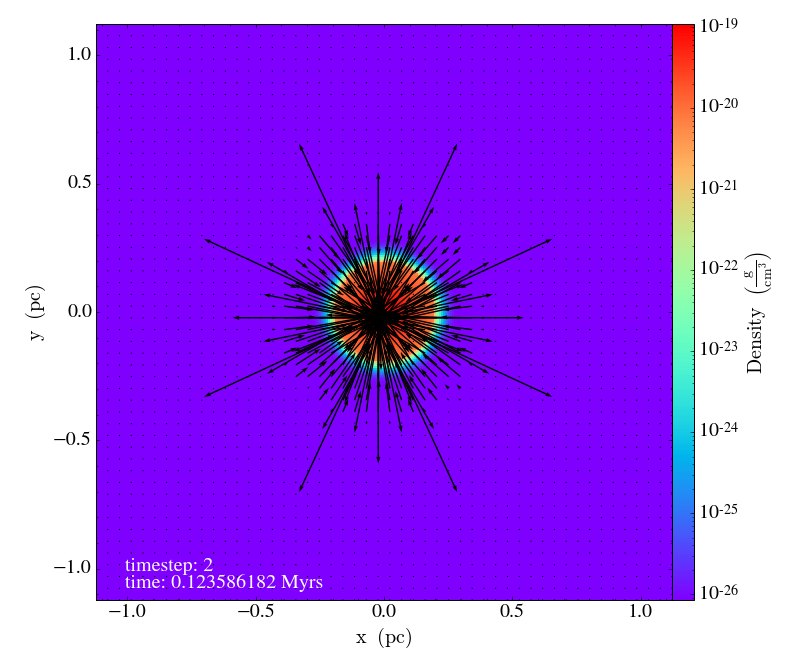

In [54]:
plot_is.plot_time_slice("density",2)


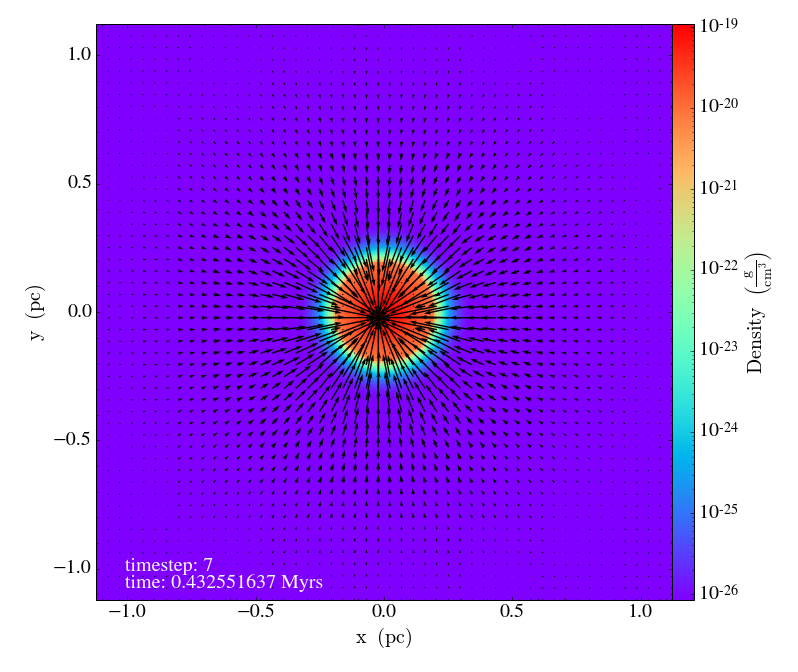

In [55]:
plot_is.plot_time_slice("density",7)


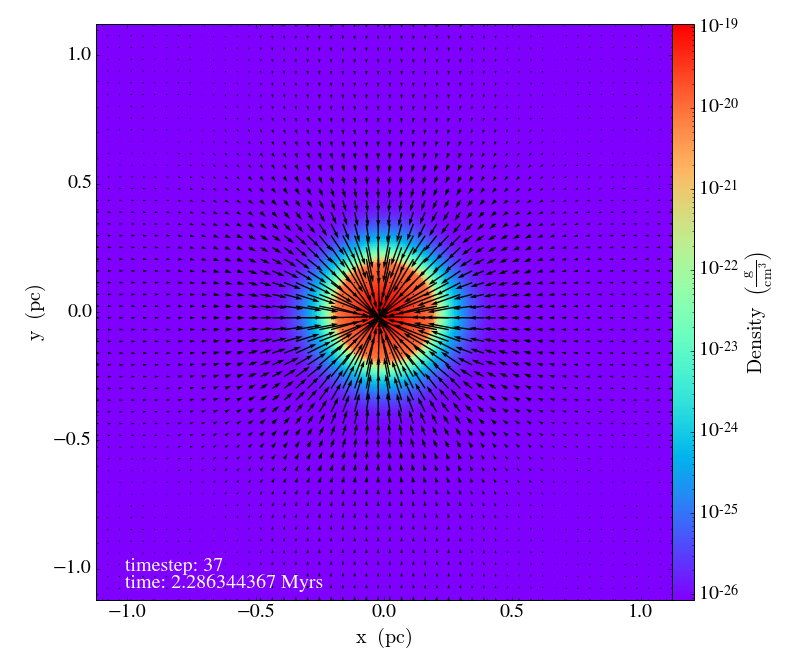

In [57]:
plot_is.plot_time_slice("density",37)

Okay this really looks like gravity is not properly turned off 


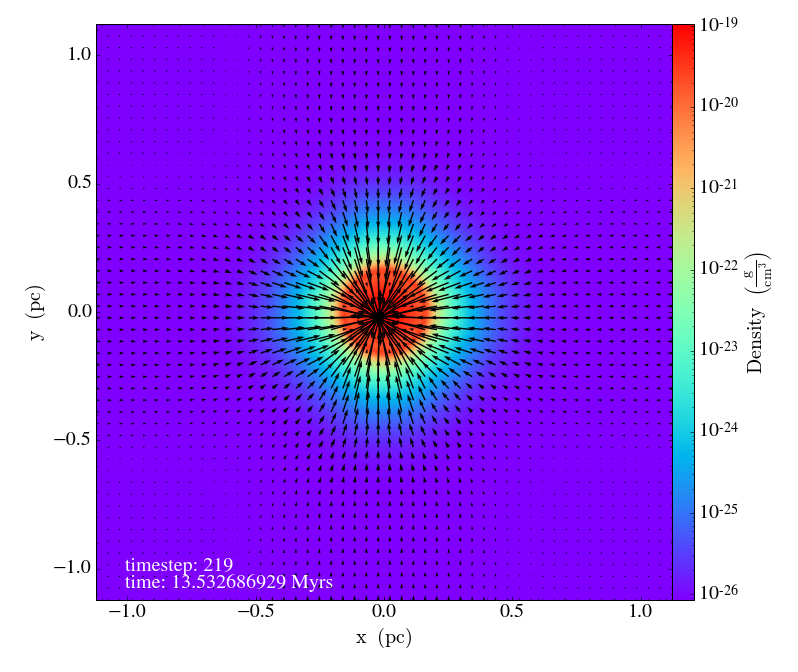

In [4]:
plot_is.plot_time_slice("density",219)